# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [825]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [826]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,$34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [827]:
#  1. Get the total rides for each city type
City_type_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
City_type_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [828]:
# 2. Get the total drivers for each city type
Driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
Driver_count.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [829]:
#  3. Get the total amount of fares for each city type
Total_Fare = pyber_data_df.groupby(["type"]).sum()["fare"]
Total_Fare.head()


type
Rural       $4,327.93
Suburban   $19,356.33
Urban      $39,854.38
Name: fare, dtype: float64

In [830]:
#  4. Get the average fare per ride for each city type. 
series1 = pd.Series(Total_Fare)
series2 = pd.Series(City_type_count)

avg_ride_fare = series1.div(series2)
avg_ride_fare.head()

type
Rural      $34.62
Suburban   $30.97
Urban      $24.53
dtype: float64

In [831]:
# 5. Get the average fare per driver for each city type. 
# series1 = pd.Series(Total_Fare)
# series2 = pd.Series(Driver_count)

avg_driver_fare = Total_Fare/Driver_count
avg_driver_fare.head()

type
Rural      $55.49
Suburban   $39.50
Urban      $16.57
dtype: float64

In [832]:
#  6. Create a PyBer summary DataFrame. 
PyBer_summary_df = pd.DataFrame({"Total Ride":City_type_count,"Total Drivers":Driver_count,"Total Fares":Total_Fare,"Average Fare per Ride":avg_ride_fare,"Average Fare per Driver":avg_driver_fare})
PyBer_summary_df

,Total Ride,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [833]:
#  7. Cleaning up the DataFrame. Delete the index name
PyBer_summary_df.index.name = None

In [834]:
#  8. Format the columns.
pd.options.display.float_format = '${:,.2f}'.format

PyBer_summary_df.head()


,Total Ride,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [835]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,$34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,$13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,$20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,$11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,$44.94,4256853490277,4,Rural


In [836]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

fare_date = pyber_data_df.groupby(["type","date"]).sum()[["fare"]]
fare_date



fare
type  date                      
Rural 2019-01-01 09:45:36 $43.69
      2019-01-02 11:18:32 $52.12
      2019-01-03 19:51:01 $19.90
      2019-01-04 03:31:26 $24.88
      2019-01-06 07:38:40 $47.33
...                          ...
Urban 2019-05-08 04:20:00 $21.99
      2019-05-08 04:39:49 $18.45
      2019-05-08 07:29:01 $18.55
      2019-05-08 11:38:35 $19.77
      2019-05-08 13:10:18 $18.04

[2375 rows x 1 columns]

In [837]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

fare_date = fare_date.reset_index()

In [838]:
fare_date

,type,date,fare
0,Rural,2019-01-01 09:45:36,$43.69
1,Rural,2019-01-02 11:18:32,$52.12
2,Rural,2019-01-03 19:51:01,$19.90
3,Rural,2019-01-04 03:31:26,$24.88
4,Rural,2019-01-06 07:38:40,$47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,$21.99
2371,Urban,2019-05-08 04:39:49,$18.45
2372,Urban,2019-05-08 07:29:01,$18.55
2373,Urban,2019-05-08 11:38:35,$19.77


In [839]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

fare_date_pivot = fare_date.pivot(index = "date", columns = "type", values = "fare")
fare_date_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,$21.99
2019-05-08 04:39:49,NaN,NaN,$18.45
2019-05-08 07:29:01,NaN,NaN,$18.55


In [840]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
select_dates = fare_date_pivot.loc['2019-01-01':'2019-04-29']
select_dates

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,$11.46
2019-04-28 16:29:16,NaN,NaN,$36.42
2019-04-28 17:26:52,NaN,NaN,$31.43


In [841]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

fare_date_pivot.index = pd.to_datetime(fare_date_pivot.index)

In [842]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_date_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [850]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fare_data = fare_date_pivot.resample('W').sum()
weekly_fare_data

type,Rural,Suburban,Urban
date,,,
2019-01-06,$187.92,$721.60,"$1,661.68"
2019-01-13,$67.65,"$1,105.13","$2,050.43"
2019-01-20,$306.00,"$1,218.20","$1,939.02"
2019-01-27,$179.69,"$1,203.28","$2,129.51"
2019-02-03,$333.08,"$1,042.79","$2,086.94"
2019-02-10,$115.80,$974.34,"$2,162.64"
2019-02-17,$95.82,"$1,045.50","$2,235.07"
2019-02-24,$419.06,"$1,412.74","$2,466.29"
2019-03-03,$175.14,$858.46,"$2,218.20"


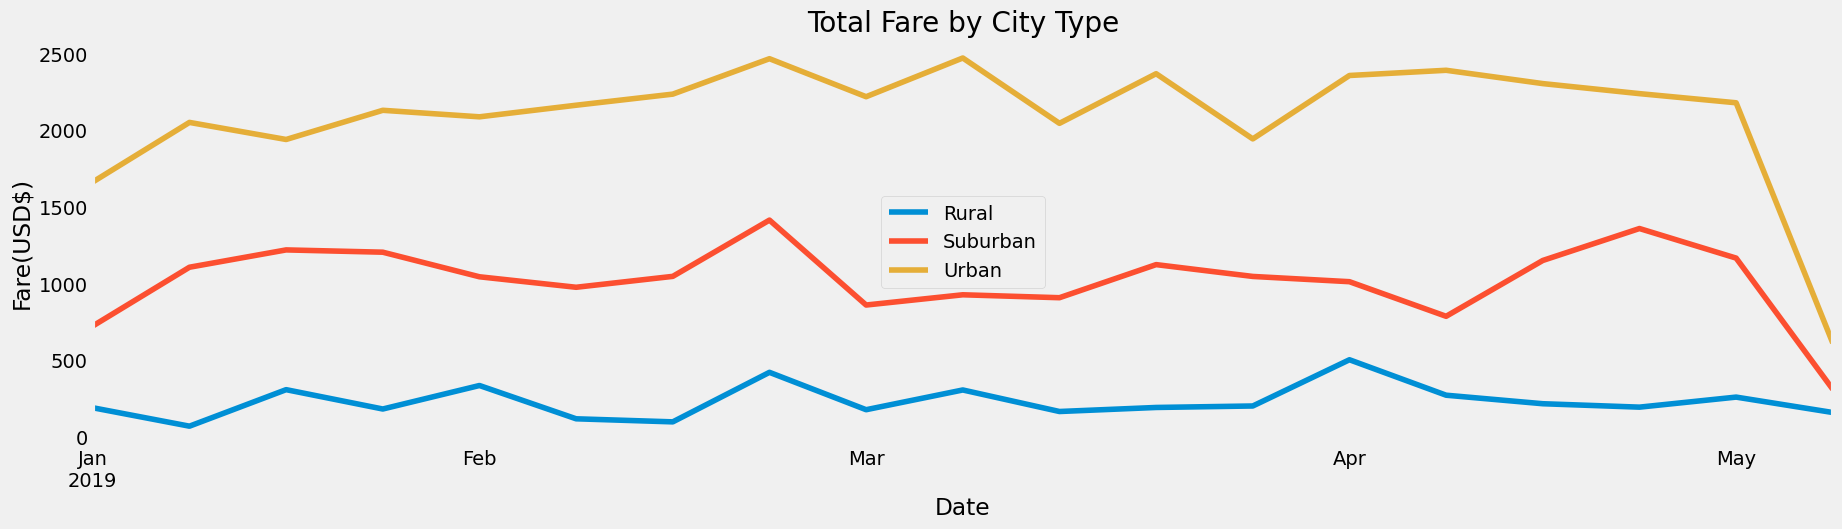

<Figure size 640x480 with 0 Axes>

In [847]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')



ax = weekly_fare_data.plot(figsize = (20,5))

PyBer_fare_summary = plt.figure()


# Create a title.
ax.set_title("Total Fare by City Type")

# Create labels for the x and y axes.
ax.set_xlabel("Date")
ax.set_ylabel("Fare(USD$)")

# Add a grid.

ax.grid ()

# Add the legend.

ax.legend()

#save in analysis folder

plt.savefig("/Users/ahsanrizvi/Desktop/class/PyBer_Analysis/Analysis/PyBer_fare_summary.png")

plt.show()

